# MATH123-FinalExam
Ethan Harvey

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Question 1
(a)

In [2]:
data = pd.read_csv("data/Fish.csv")
# load X and y
X = data.drop(columns=["Species","Weight"]).to_numpy()
y = data["Weight"].to_numpy()
y = np.reshape(y, (len(y),1))
# build regression model
reg = LinearRegression().fit(X, y)

(b)

$\begin{equation}
\begin{aligned}
& \underset{\beta}{\text{minimize}}
& & ||y-A\beta||_{2}^{2} \\
\end{aligned}
\end{equation}$

$(Y-A\beta)^{T}(Y-A\beta) = Y^{T}Y-Y^{T}A\beta-\beta^{T}A^{T}Y+\beta^{T}A^{T}A\beta$

$\frac{\partial}{\partial \beta}= -2A^{T}Y+2A^{T}A\beta = 0$

$\beta^{*} = (A^{T}A)^{-1}A^{T}Y$

(c)

In [3]:
coefficients = np.hstack((reg.intercept_, reg.coef_[0]))
print(coefficients[4])

28.050052862684584


The coefficient $\beta_{4} = \frac{\text{change in height}}{\text{change in weight}}$. The expected mean change in weight in grams for $1$ centimeter increase in height is $28.050052862684584$ grams.

(d)

In [4]:
print(reg.score(X, y))

0.885869307024444


The $R^{2}$ score for this model is $0.885869307024444$. This is a good model based on its $R^{2}$ score. The best possible $R^{2}$ score is $1$ and a model that always predicts $\bar{y}$ has an $R^{2}$ score of $0$. $R^{2} = 1 - \frac{\text{residual sum of squares}}{\text{total sum of squares}}$.

(e)

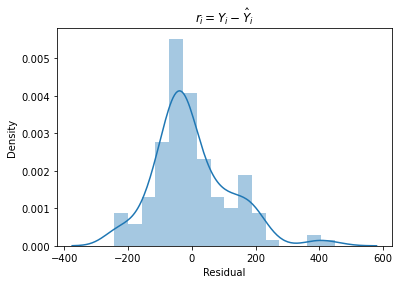

In [5]:
yhat = reg.predict(X)
residuals = y - yhat
sns.distplot(residuals)
plt.title("$r_{i} = Y_{i}-\hat{Y}_{i}$")
plt.xlabel("Residual")
plt.show()

As we can see from the histogram, this model satisfies the assumption that the residuals need to be normally distributed (the residuals are more or less normally distributed).

(f)

In [6]:
yhat = reg.predict([np.mean(X, axis=0)])
print(yhat[0][0])
# scale y
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)
# build regression model
reg_scaled = LinearRegression().fit(X, y_scaled)

398.9553459119497


(g)

In [7]:
coefficients = np.hstack((reg.intercept_, reg.coef_[0]))
coefficients_scaled = np.hstack((reg_scaled.intercept_, reg_scaled.coef_[0]))
print(f"Unstandardized coefficients:\n{np.array2string(coefficients)}")
print(f"\nStandardized coefficients:\n{np.array2string(coefficients_scaled)}")
# find the original coefficients
b0 = reg_scaled.intercept_*y.std()+y.mean()
print(f"\nTransformed standardized coefficients:\n{np.array2string(np.hstack((b0,reg_scaled.coef_[0]*y.std())))}")

Unstandardized coefficients:
[-497.73148104   63.4308072    -8.24701709  -28.42163554   28.05005286
   23.09898474]

Standardized coefficients:
[-2.51711576  0.17805847 -0.02315044 -0.0797832   0.07874012  0.06484183]

Transformed standardized coefficients:
[-497.73148104   63.4308072    -8.24701709  -28.42163554   28.05005286
   23.09898474]


My coefficients are not the same as before. The original coefficients can be derived by the following equations

$\beta_{i} = \beta_{st,i}\times\sigma$

$\beta_{0} = (\beta_{st,0}\times\sigma)+\mu$

where $\sigma$ is the standard deviation of the dependent variable weight and $\mu$ is the mean of the dependent variable weight.

(h)

In [8]:
perch = (data["Species"]=="Perch").to_numpy()
non_perch = ~(data["Species"]=="Perch").to_numpy()
perch_features = np.array(np.vstack((perch, non_perch)),dtype=int).T
# build regression model
perch_reg = LinearRegression().fit(perch_features, y)
print(perch_reg.score(perch_features, y))

-0.0026403324202637357


This is not a good idea. Feature $X_{6}$ is just the logical not of feature $X_{7}$ ($X_{6} =$ ~$X_{7}$). Just knowing if a fish is a perch or not will not help us make accurate predictions of the weight of many species of fish. However, it might improve the $R^{2}$ score of our model in (a) if we include a one hot encoding of all the species of fish in our model.

### Question 2

(a) 

$\sum_{j=1}^{n}a_{j}y_{j}(x_{i}\cdot x_{j})-\frac{1}{2}(\underset{i | y_{i}=-1}{\text{max}}(\sum_{j=1}^{n}a_{j}y_{j}(x_{i}\cdot x_{j}))-\underset{i | y_{i}=1}{\text{min}}(\sum_{j=1}^{n}a_{j}y_{j}(x_{i}\cdot x_{j})))$

(b)

$\sum_{j=1}^{n}a_{j}y_{j}(e^{\frac{||x_{i}-x_{j}||_{2}^{2}}{2\sigma^{2}}})-\frac{1}{2}(\underset{i | y_{i}=-1}{\text{max}}(\sum_{j=1}^{n}a_{j}y_{j}(e^{\frac{||x_{i}-x_{j}||_{2}^{2}}{2\sigma^{2}}}))-\underset{i | y_{i}=1}{\text{min}}(\sum_{j=1}^{n}a_{j}y_{j}(e^{\frac{||x_{i}-x_{j}||_{2}^{2}}{2\sigma^{2}}})))$

(c)

If we remove the third training data point $(x_{3}, y_{3})$, the classifier function does not change. Since $\alpha_{3}^{*}=0$, the sum of the classfier function at that point will be $0$.

### Question 3

(a)

$y_{ij} = \begin{cases} 
0 & w_{ij}^{T}x+b_{ij}\leq 0 \\
1 & w_{ij}^{T}x+b_{ij}\gt 0
\end{cases}$

If we multiply all of the weights and biases by a constant $c\gt0$

$y_{ij} = \begin{cases} 
0 & cw_{ij}^{T}x+cb_{ij}\leq 0 \\
1 & cw_{ij}^{T}x+cb_{ij}\gt 0
\end{cases}$

$y_{ij} = \begin{cases} 
0 & (c)(w_{ij}^{T}x+b_{ij})\leq 0 \\
1 & (c)(w_{ij}^{T}x+b_{ij})\gt 0
\end{cases}$

If we divide each side by the constant $c$ we will get the original equation. Since multiplying all of the weights and biases by a constant $c\gt0$ does not change the sign of $w_{ij}^{T}x+b_{ij}$ the behavor of the network will not change.

(b)

$y_{ij} = \frac{1}{1+e^{-(w_{ij}^{T}x+b_{ij})}}$

If we multiply all of the weights and biases by a constant $c\gt0$

$y_{ij} = \frac{1}{1+e^{-(cw_{ij}^{T}x+cb_{ij})}}$

$y_{ij} = \frac{1}{1+e^{-(c)(w_{ij}^{T}x+b_{ij})}}$

If $w_{ij}^{T}x+b_{ij}\lt0$, then as $c \to \infty$

$y_{ij} = \frac{1}{1+e^{-(c)(w_{ij}^{T}x+b_{ij})}} = \frac{1}{1+e^{\infty}} \approx \frac{1}{1+\infty} \approx 0$

If $w_{ij}^{T}x+b_{ij}\gt0$, then as $c \to \infty$

$y_{ij} = \frac{1}{1+e^{-(c)(w_{ij}^{T}x+b_{ij})}} = \frac{1}{1+e^{-\infty}} \approx \frac{1}{1+0} \approx 1$

Therefore, as $c \to \infty$ 

$y_{ij} = \frac{1}{1+e^{-(c)(w_{ij}^{T}x+b_{ij})}}$

can be rewritten as

$y_{ij} = \begin{cases} 
0 & w_{ij}^{T}x+b_{ij}\lt 0 \\
1 & w_{ij}^{T}x+b_{ij}\gt 0
\end{cases}$

which is the same as the network of perceptrons from part (a).

### Question 4

(a)

I took this class because I was interested in learning mathmatical aspects of data analysis.

(b)

Python